## Unsupervised Machine Learning: Clustering

### In this script includes the following topics

    I.   Install and import libraries and dataset
    II.  Elbow technique
    III. k-means clustering
    IV.  Calculate the descriptive statistics

## I.   Install and import libraries and dataset

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [67]:
# Create path

path = r'C:\Users\inesh\Documents\Learning\CF_Data Analytics course\Data Analytics Immesion\Achievement 6\Hotel Booking Data Analysis'

In [68]:
# Importing the cleaned dataset

df_hotel_cleaned = pd.read_pickle(os.path.join(path, 'II. Data Set', 'Prepared Data', 'df_hotel_cleaned_6.2.pkl'))

In [69]:
df_hotel_cleaned.head(5)

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,customer_origin_country,State,City,Destination Country,...,No. Of People,Check-in date,Number_of_days_booked,No_of_rooms_booked,Hotel Name,Hotel Rating,Total_booking_Price_SG$,Profit Margin,Room_price_per_day_SG$,Price Category
0,DDMY00001,2010-01-01,2024-03-04 10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,...,1,2010-01-12,8,1,Hotel Triton,4.3,243,0.25,243.000000,Mid Price
1,DDID00002,2010-01-01,2024-03-04 09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,Colombia,...,3,2010-01-21,1,2,Enchanted Isle,4.2,312,0.24,156.000000,Mid Price
2,DDSG00003,2010-01-01,2024-03-04 11:52:56,SG00001,Female,31,Singapore,Central,Rochor,Germany,...,3,2010-01-02,7,2,Seacoast Hotel,4.5,338,0.20,169.000000,Mid Price
3,DDSG00004,2010-01-01,2024-03-04 13:44:40,SG00002,Male,28,Singapore,North,Yishun,Canada,...,3,2010-02-15,4,2,Night In Paradise,4.2,254,0.13,127.000000,Low Price
4,DDKH00005,2010-01-01,2024-03-04 05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,...,5,2010-01-03,3,3,Tiny Digs Hotel,4.6,313,0.17,104.333333,Low Price


## II.  Elbow technique

In [70]:
df_hotel_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66536 entries, 0 to 66540
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Booking ID               66536 non-null  object        
 1   Date of Booking          66536 non-null  datetime64[ns]
 2   Time                     66536 non-null  datetime64[ns]
 3   Customer ID              66536 non-null  object        
 4   Gender                   66536 non-null  object        
 5   Age                      66536 non-null  int64         
 6   customer_origin_country  66536 non-null  object        
 7   State                    66536 non-null  object        
 8   City                     66536 non-null  object        
 9   Destination Country      66536 non-null  object        
 10  Destination City         66536 non-null  object        
 11  No. Of People            66536 non-null  int64         
 12  Check-in date            66536 non-nu

##### Creating a subset of numerical datans]

In [71]:
## Create numerical_subset

numerical_columns = df_hotel_cleaned.select_dtypes(include=['int64', 'float64']).columns
numerical_subset = df_hotel_cleaned[numerical_columns]

In [72]:
## Check on numerical_subset

numerical_subset.head()

,Age,No. Of People,Number_of_days_booked,No_of_rooms_booked,Hotel Rating,Total_booking_Price_SG$,Profit Margin,Room_price_per_day_SG$
0,42,1,8,1,4.3,243,0.25,243.000000
1,44,3,1,2,4.2,312,0.24,156.000000
2,31,3,7,2,4.5,338,0.20,169.000000
3,28,3,4,2,4.2,254,0.13,127.000000
4,44,5,3,3,4.6,313,0.17,104.333333


In [73]:
numerical_subset.describe()

,Age,No. Of People,Number_of_days_booked,No_of_rooms_booked,Hotel Rating,Total_booking_Price_SG$,Profit Margin,Room_price_per_day_SG$
count,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000
mean,38.436110,3.995807,3.233753,2.283380,4.288508,214.053730,0.188816,120.016938
std,11.556725,2.000135,3.377925,1.031159,0.275518,108.126539,0.052766,92.845079
min,19.000000,1.000000,1.000000,1.000000,3.300000,35.000000,0.100000,8.750000
25%,28.000000,2.000000,1.000000,1.000000,4.200000,125.000000,0.140000,53.666667
50%,38.000000,4.000000,2.000000,2.000000,4.300000,199.000000,0.200000,92.666667
75%,48.000000,6.000000,4.000000,3.000000,4.500000,293.000000,0.230000,156.000000
max,58.000000,7.000000,97.000000,4.000000,4.700000,578.000000,0.300000,575.000000


#### standardizing data(numerical data)

In [74]:
# Create a StandardScaler to standardize data
scaler = StandardScaler()

# Fit and transform the numerical_subset
numerical_scaled = scaler.fit_transform(numerical_subset)

# Convert the scaled array back to a DataFrame
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_subset.columns)

In [75]:
numerical_scaled_df

,Age,No. Of People,Number_of_days_booked,No_of_rooms_booked,Hotel Rating,Total_booking_Price_SG$,Profit Margin,Room_price_per_day_SG$
0,0.308385,-1.497814,1.411009,-1.244610,0.041709,0.267709,1.159541,1.324615
1,0.481445,-0.497874,-0.661285,-0.274820,-0.321246,0.905855,0.970025,0.387563
2,-0.643449,-0.497874,1.114967,-0.274820,0.767619,1.146316,0.211961,0.527582
3,-0.903040,-0.497874,0.226841,-0.274820,-0.321246,0.369443,-1.114651,0.075213
4,0.481445,0.502067,-0.069201,0.694971,1.130574,0.915104,-0.356587,-0.168924
...,...,...,...,...,...,...,...,...
66531,0.308385,0.002096,0.226841,-0.274820,0.041709,-0.296449,0.970025,-0.312533
66532,1.346749,0.002096,0.226841,-0.274820,-0.321246,-0.823613,0.022445,-0.619498
66533,1.606340,1.502007,-0.661285,1.664761,0.404664,0.961346,0.590993,-0.436396
66534,0.481445,-0.497874,-0.661285,-0.274820,-0.321246,-0.379685,1.159541,-0.361001


In [76]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [77]:
 # Creates a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(numerical_scaled_df).score(numerical_scaled_df) for i in range(len(kmeans))]

C:\Users\inesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\inesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\inesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\inesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [78]:
score

[-532287.9999999999,
 -409833.9434467915,
 -346045.590929143,
 -308512.60372989724,
 -284921.017412416,
 -268116.184699215,
 -247710.43575288408,
 -232964.71699874225,
 -221781.7204906672]

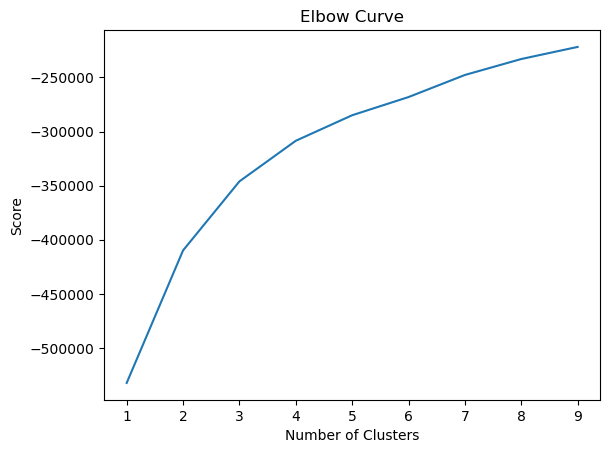

In [79]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Elbow has slightly bends at 2 to 3 and 3 to 4 before shapening. Therefore, selecting 3 clusters for k mean.

## III. k-means clustering

In [80]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [81]:
# Fit the k-means object to the data.

kmeans.fit(numerical_subset)

C:\Users\inesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [82]:
from sklearn.cluster import KMeans ## to avoid the future warning and ensure consistent behavior across different versions of scikit-learn

kmeans = KMeans(n_clusters=3, n_init=10)

In [83]:
kmeans.fit(numerical_scaled_df)

KMeans(n_clusters=3, n_init=10)

In [84]:
## Create cluster column in df

numerical_scaled_df['clusters'] = kmeans.fit_predict(numerical_scaled_df)

In [85]:
numerical_scaled_df.head()

,Age,No. Of People,Number_of_days_booked,No_of_rooms_booked,Hotel Rating,Total_booking_Price_SG$,Profit Margin,Room_price_per_day_SG$,clusters
0,0.308385,-1.497814,1.411009,-1.244610,0.041709,0.267709,1.159541,1.324615,2
1,0.481445,-0.497874,-0.661285,-0.274820,-0.321246,0.905855,0.970025,0.387563,2
2,-0.643449,-0.497874,1.114967,-0.274820,0.767619,1.146316,0.211961,0.527582,2
3,-0.903040,-0.497874,0.226841,-0.274820,-0.321246,0.369443,-1.114651,0.075213,2
4,0.481445,0.502067,-0.069201,0.694971,1.130574,0.915104,-0.356587,-0.168924,0


In [86]:
# Check cluster counts 

numerical_scaled_df['clusters'].value_counts()

clusters
0    26955
2    22339
1    17242
Name: count, dtype: int64

#### Cluster plot with numerical_scaled_df

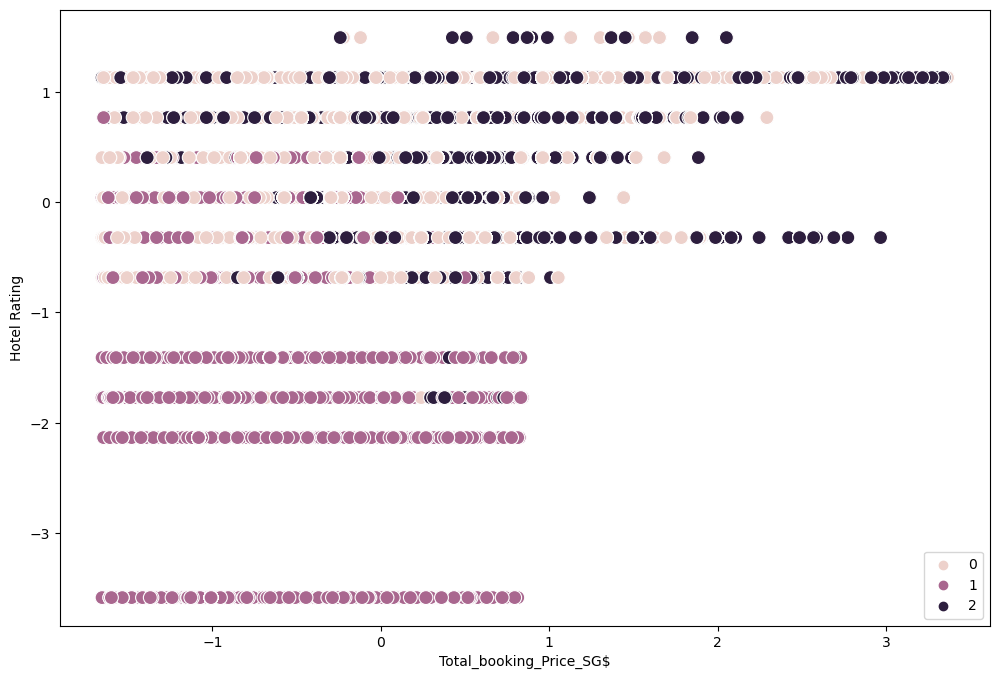

In [87]:
# Plot the clusters for the "Hotel Rating" and "Total_booking_Price_SG$" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_scaled_df['Total_booking_Price_SG$'], y=numerical_scaled_df['Hotel Rating'], hue=kmeans.labels_, s=100) 

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total_booking_Price_SG$') # Label x-axis.
plt.ylabel('Hotel Rating') # Label y-axis.
plt.show()

##### When hotel rating is below -1 (scaled value) Total_booking_Price_SG$ is almost less than below the value of 1 (scaled value). 

This means when hotel rating is low, the  possibility of setting a higher price is also low. However, there are very few plots that show higher Total_booking_Price_SG$ even with low hotel rating.

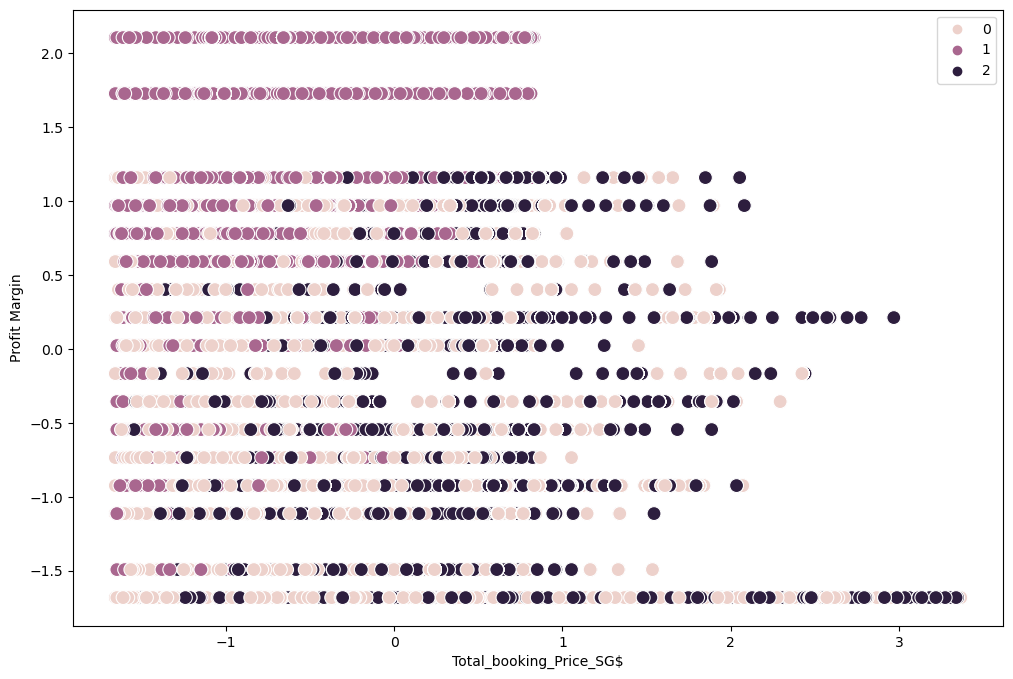

In [88]:
# Plot the clusters for the "Profit Margin" and "Total_booking_Price_SG$" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_scaled_df['Total_booking_Price_SG$'], y=numerical_scaled_df['Profit Margin'], hue=kmeans.labels_, s=100) 


# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total_booking_Price_SG$') # Label x-axis.
plt.ylabel('Profit Margin') # Label y-axis.
plt.show()

#### It is interesting to see that there are some hotels making high profit even the total booking price is low

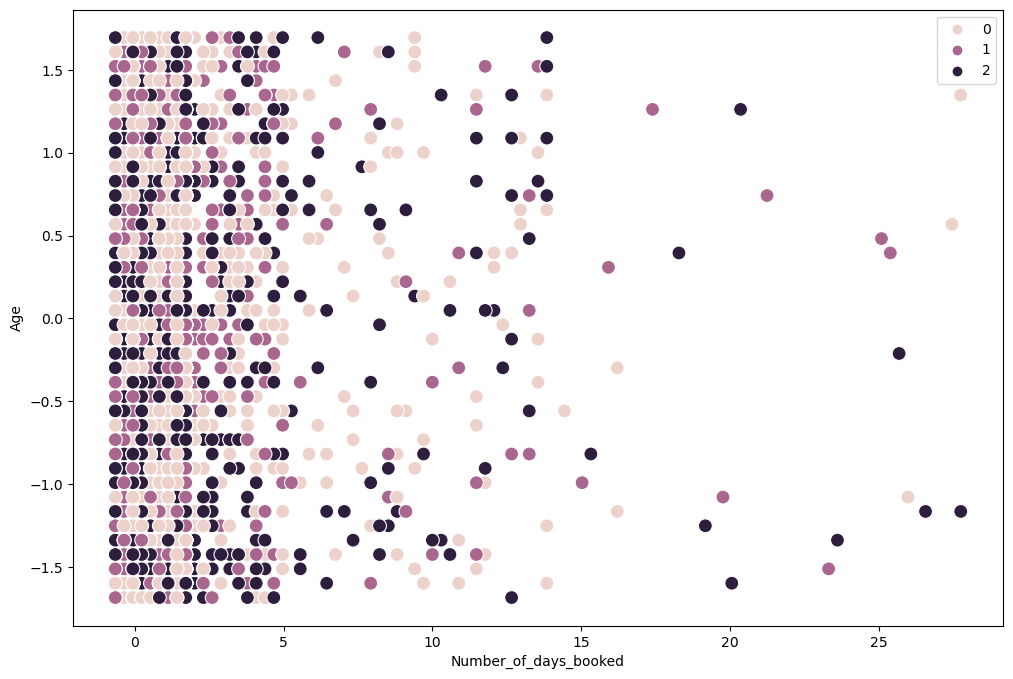

In [95]:
# Plot the clusters for the "Number_of_days_booked" and "Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_scaled_df['Number_of_days_booked'], y=numerical_scaled_df['Age'], hue=kmeans.labels_, s=100) 

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number_of_days_booked') # Label x-axis.
plt.ylabel('Age') # Label y-axis.
plt.show()

#### It is difficult to identify any pattern of no of gays booed by customer age group

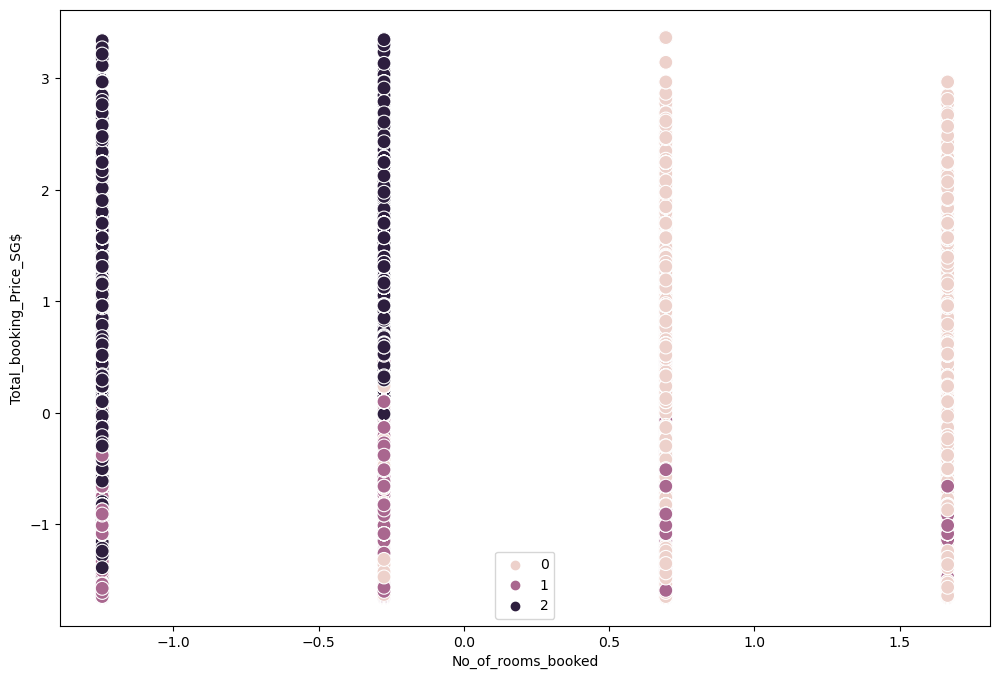

In [96]:
# Plot the clusters for the "No_of_rooms_booked" and "Total_booking_Price_SG$" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_scaled_df['No_of_rooms_booked'], y=numerical_scaled_df['Total_booking_Price_SG$'], hue=kmeans.labels_, s=100) 

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('No_of_rooms_booked') # Label x-axis.
plt.ylabel('Total_booking_Price_SG$') # Label y-axis.
plt.show()

#### When booking price is high, number of rooms booked is low

## descriptive statistics

In [98]:
numerical_scaled_df.columns

Index(['Age', 'No. Of People', 'Number_of_days_booked', 'No_of_rooms_booked',
       'Hotel Rating', 'Total_booking_Price_SG$', 'Profit Margin',
       'Room_price_per_day_SG$', 'clusters'],
      dtype='object')

In [101]:
# Assuming kmeans.labels_ contains the cluster labels assigned by the k-means algorithm
numerical_scaled_df['cluster'] = kmeans.labels_

# Group by the 'cluster' column and compute aggregate statistics
summary_statistics = numerical_scaled_df.groupby('cluster').agg({'Age':['mean', 'median'], 
                                                                'Number_of_days_booked':['mean', 'median'], 
                                                                'No_of_rooms_booked':['mean', 'median'],
                                                                'Hotel Rating':['mean', 'median'],
                                                                'Total_booking_Price_SG$':['mean', 'median']})


In [103]:
summary_statistics

Age           Number_of_days_booked            \
             mean    median                  mean    median   
cluster                                                       
0        0.018201  0.048794             -0.002919 -0.365243   
1       -0.018531 -0.037737              0.019653 -0.365243   
2       -0.007659 -0.037737             -0.011646 -0.365243   

        No_of_rooms_booked           Hotel Rating            \
                      mean    median         mean    median   
cluster                                                       
0                 0.901053  0.694971     0.308697  0.404664   
1                -0.254459 -0.274820    -1.095383 -0.684201   
2                -0.890842 -1.244610     0.472969  0.767619   

        Total_booking_Price_SG$            
                           mean    median  
cluster                                    
0                      0.090952 -0.028242  
1                     -0.890867 -0.971589  
2                      0.577856  0.609904

#### Descriptive statistics with numerical_subset DF

In [107]:
# Assuming kmeans.labels_ contains the cluster labels assigned by the k-means algorithm
numerical_subset['cluster'] = kmeans.labels_

# Group by the 'cluster' column and compute aggregate statistics
summary_statistics_2 = numerical_subset.groupby('cluster').agg({'Age':['mean', 'median'], 
                                                                'Number_of_days_booked':['mean', 'median'], 
                                                                'No_of_rooms_booked':['mean', 'median'],
                                                                'Hotel Rating':['mean', 'median'],
                                                                'Total_booking_Price_SG$':['mean', 'median']})


C:\Users\inesh\AppData\Local\Temp\ipykernel_20184\1038737406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_subset['cluster'] = kmeans.labels_


In [108]:
summary_statistics_2

Age        Number_of_days_booked        No_of_rooms_booked  \
              mean median                  mean median               mean   
cluster                                                                     
0        38.646448   39.0              3.223892    2.0           3.212502   
1        38.221958   38.0              3.300139    2.0           2.020995   
2        38.347598   38.0              3.194413    2.0           1.364788   

               Hotel Rating        Total_booking_Price_SG$         
        median         mean median                    mean median  
cluster                                                            
0          3.0     4.373560    4.4              223.887961  211.0  
1          2.0     3.986713    4.1              117.728106  109.0  
2          1.0     4.418819    4.5              276.534805  280.0

#### This Cluster analysis result will be usefull when answering business questions related to Booking pattern trends & customer segmentations